# Agrupamento hierarquico

- serve para indicar o melhor numero de clusters
- é criada uma estrutura em formato de arvore que indica o numero de clusters
- Abordagem aglomerativa: cada registro pertence ao seu proprio cluster e pares de cluster sao unidos
- os resultados podem ser apresentados em um dentrograma

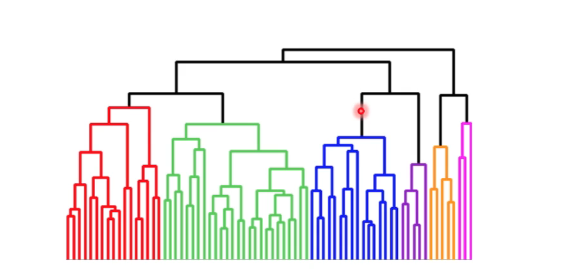

Faremos esse dentrograma calculando as distancia entre os registos

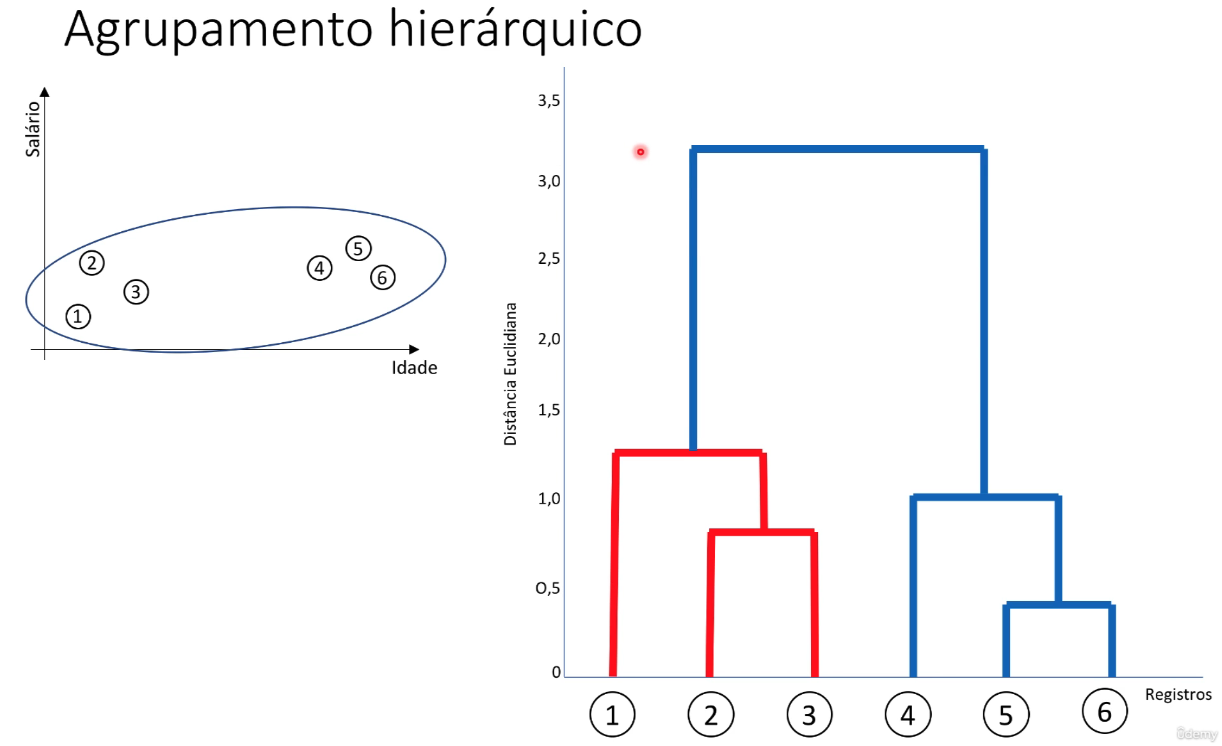

- Vamos fazer uma **barra horinzontal** e o numero de linhas que ela interseção vai ser o numero de clusters
-  pega a maior linha vertical que conseguimos que nao cruze com nenhuma outra
- colocamos o traço nessa linha

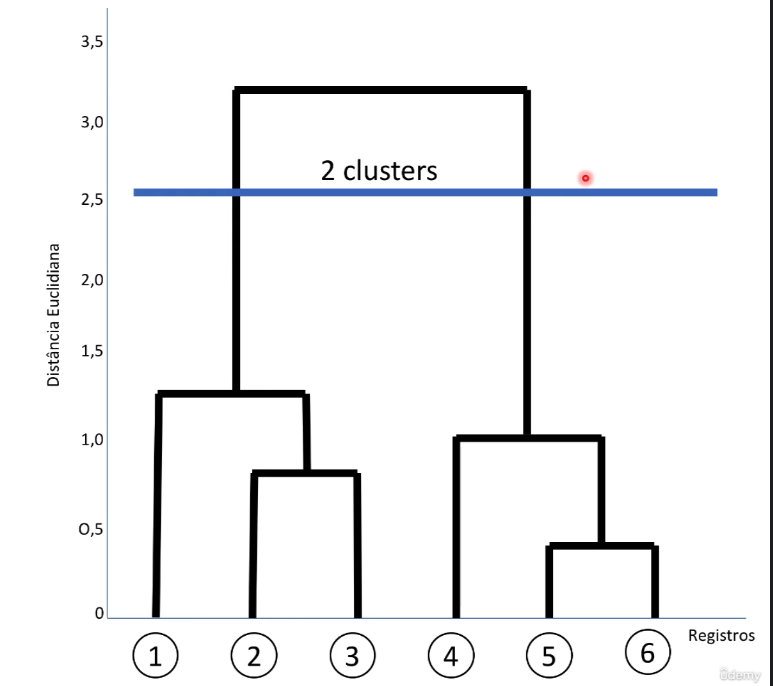

# Implementação agrupamento hierarquico


## Base salario idade

In [1]:
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [2]:
base_salario = np.array([[20, 1000], [21,1200] , [21,2900] , [37,1850] , [46,900],
[53,950] , [55,2000] , [47,2100] , [52,3000], [32,5900] ,
[39,4100] , [41,5100] , [39, 7000] , [48, 5000] , [48,6500] ])

scaler_salario = StandardScaler()
base_salario = scaler_salario.fit_transform(base_salario)
base_salario

array([[-1.74874734, -1.11413572],
       [-1.66101754, -1.01725435],
       [-1.66101754, -0.19376273],
       [-0.25734075, -0.70238991],
       [ 0.53222745, -1.1625764 ],
       [ 1.14633605, -1.13835606],
       [ 1.32179565, -0.62972888],
       [ 0.61995725, -0.5812882 ],
       [ 1.05860625, -0.14532205],
       [-0.69598974,  1.25945777],
       [-0.08188115,  0.38752547],
       [ 0.09357845,  0.8719323 ],
       [-0.08188115,  1.79230528],
       [ 0.70768705,  0.82349162],
       [ 0.70768705,  1.55010187]])

In [4]:
grafico = px.scatter(x=base_salario[:, 0], y=base_salario[:, 1])
grafico.show()

In [7]:
# fazendo o dentrograma
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

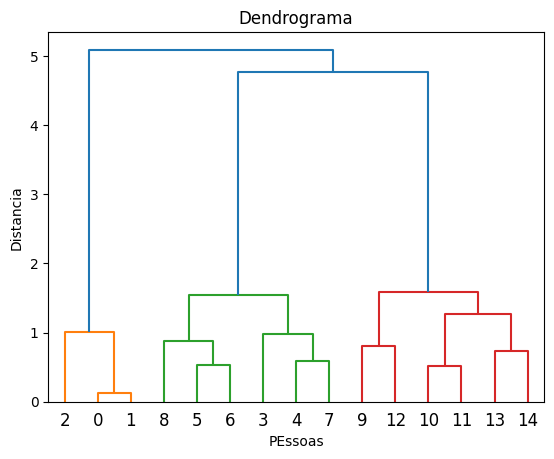

In [10]:
dendrograma = dendrogram(linkage(base_salario, method='ward'))
plt.title('Dendrograma')
plt.xlabel('PEssoas')
plt.ylabel('Distancia');

In [11]:
# A melhor reta pega 3 barras
from sklearn.cluster import AgglomerativeClustering

In [15]:
hc_salario = AgglomerativeClustering(n_clusters = 3, linkage='ward', affinity='euclidean') # affinity é a forma de calcular distancia
rotulos = hc_salario.fit_predict(base_salario)
rotulos

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



array([1, 1, 1, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0])

In [17]:
grafico = px.scatter(x=base_salario[:, 0], y=base_salario[:, 1], color = rotulos)
grafico.show()

## Base cartao

In [18]:
import pandas as pd
# Essa base de dados tem como objetivo prever se uma pessoa vai pagar  cartao de credito ou nao, faremos grupos nessa base
base_cartao = pd.read_csv('/content/drive/MyDrive/Machine Learning e Data Science com Python de A a Z/Bases de dados/credit_card_clients.csv', header=1)
base_cartao['BILL_TOTAL'] = base_cartao['BILL_AMT1'] + base_cartao['BILL_AMT2'] + base_cartao['BILL_AMT3'] + base_cartao['BILL_AMT4'] + base_cartao['BILL_AMT5']
X_cartao = base_cartao.iloc[:, [1,25]].values
scaler_cartao = StandardScaler()
X_cartao = scaler_cartao.fit_transform(X_cartao)


In [20]:
X_cartao # Apenas com limite e gastos

array([[-1.13672015, -0.68703183],
       [-0.3659805 , -0.66822573],
       [-0.59720239, -0.44580167],
       ...,
       [-1.05964618, -0.55338602],
       [-0.67427636, -0.04099347],
       [-0.90549825, -0.04747345]])

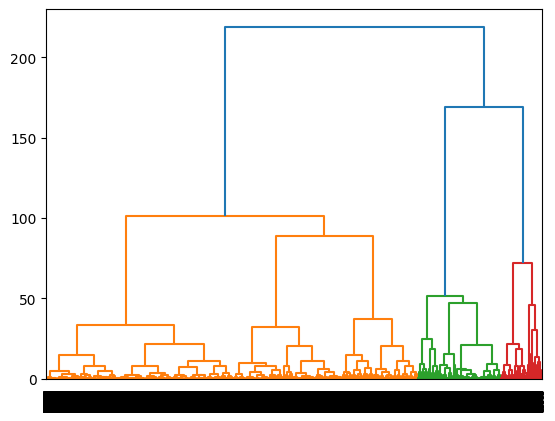

In [21]:
dendrograma = dendrogram(linkage(X_cartao, method='ward'))

In [22]:
# A melhor barra tem 3 cruzamentos

In [23]:
hc_cartao = AgglomerativeClustering(n_clusters = 3, linkage='ward', affinity='euclidean') # affinity é a forma de calcular distancia
rotulos = hc_cartao.fit_predict(X_cartao)
rotulos

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



array([0, 0, 0, ..., 0, 0, 0])

In [24]:
grafico = px.scatter(x=X_cartao[:, 0], y=X_cartao[:, 1], color = rotulos)
grafico.show()

# DBSCAN - teoria

- baseado em densidade, agrupando pontos similares no mesmo espaço
- nao é necessario especificar o numero de clusters
- **em geral** apresenta melhores resultados que o k-means
- mais rapido que o k-means
- tenta encontra os pontos que sao separados por uma distancia nao maior que um limiar


```
- começa um cluster em um lugar aleatorio
- cluster vai pra cima do registro mais proximo
- vai pro proximo mais perto
- faz esse processo de ir "comendo" os registros ate nao ter mais nenhum registro perto, entao cria-se outro cluster
```
- Encontra padroes nao lineares
- robusto conta outliers
- resultado pode ser mais consistente que o k-means
- pode ser didifil de encontrar um bom valor para o parametro da distancia



# DBSCAN - implementação

## Base salario

In [25]:
base_salario

array([[-1.74874734, -1.11413572],
       [-1.66101754, -1.01725435],
       [-1.66101754, -0.19376273],
       [-0.25734075, -0.70238991],
       [ 0.53222745, -1.1625764 ],
       [ 1.14633605, -1.13835606],
       [ 1.32179565, -0.62972888],
       [ 0.61995725, -0.5812882 ],
       [ 1.05860625, -0.14532205],
       [-0.69598974,  1.25945777],
       [-0.08188115,  0.38752547],
       [ 0.09357845,  0.8719323 ],
       [-0.08188115,  1.79230528],
       [ 0.70768705,  0.82349162],
       [ 0.70768705,  1.55010187]])

In [26]:
from sklearn.cluster import DBSCAN

In [29]:
dbsan_salario = DBSCAN(eps = 0.95, min_samples = 2)# eps : distancia maxima para que a seleção dos registros que estao na vizinhança seja feita  /// min_samples:quantos registros dentro do raio precisam ter para ser considerado como um cluster
dbsan_salario.fit(base_salario)

DBSCAN(eps=0.95, min_samples=2)

In [30]:
rotulos = dbsan_salario.labels_
rotulos  # -1 sao ruidos

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

é muito comum que tenham muitos valores de ruidos, precisamos alterar os paremetros do DBSCAN para melhorar os resultaods

In [31]:
grafico = px.scatter(x=base_salario[:, 0], y=base_salario[:, 1], color = rotulos)
grafico.show()

## Base cartao de credito

In [32]:
X_cartao

array([[-1.13672015, -0.68703183],
       [-0.3659805 , -0.66822573],
       [-0.59720239, -0.44580167],
       ...,
       [-1.05964618, -0.55338602],
       [-0.67427636, -0.04099347],
       [-0.90549825, -0.04747345]])

In [36]:
dbscan_cartao = DBSCAN(eps = 0.37, min_samples= 5)
rotulos = dbscan_cartao.fit_predict(X_cartao)

In [37]:
rotulos

array([0, 0, 0, ..., 0, 0, 0])

In [38]:
# Vendo quantos elementos temos em cada grupo
np.unique(rotulos, return_counts=True)

(array([-1,  0,  1,  2]), array([   48, 29934,    14,     4]))

In [39]:
grafico = px.scatter(x=X_cartao[:, 0], y=X_cartao[:, 1], color = rotulos)
grafico.show()

# K-Means X Hierarquico X DBSCAN

In [40]:
from sklearn import datasets

In [45]:
X_random, y_random = datasets.make_moons(n_samples=1500, noise=0.09)

In [46]:
X_random # Variaveis

array([[ 0.22997878, -0.12374028],
       [ 1.92590881, -0.01521249],
       [-0.56009392,  0.92728241],
       ...,
       [ 0.92002796,  0.72809906],
       [ 1.71979162, -0.26701473],
       [ 0.83776439,  0.23740912]])

In [47]:
y_random # Grupos

array([1, 1, 0, ..., 0, 1, 0])

In [49]:
grafico = px.scatter(x=X_random[:, 0], y=X_random[:, 1])
grafico.show()

Vamos aplicar os tres algoritmos e ver qual consegue fazer a divisao mais correta dessa base de dados

In [50]:
# Kmeans
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
rotulos = kmeans.fit_predict(X_random)
grafico = px.scatter(x=X_random[:, 0], y=X_random[:, 1], color = rotulos)
grafico.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Nao identificou bem

In [51]:
hc = AgglomerativeClustering(n_clusters = 2, linkage='ward', affinity='euclidean')
rotulos = hc.fit_predict(X_random)
grafico = px.scatter(x=X_random[:, 0], y=X_random[:, 1], color = rotulos)
grafico.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



Resultado um pouco mlehor que o kmeans, mas ainda nao está perfeito

In [52]:
dbscan = DBSCAN(eps=0.1)
rotulos = dbscan.fit_predict(X_random)
grafico = px.scatter(x=X_random[:, 0], y=X_random[:, 1], color = rotulos)
grafico.show()

Divisao do grupo **basicamente perfeita**, mas ainda temoss valores nao identificados(ruidos)



```
Resultado:

para aplicações mais tradicionais, como base de credito, é mais indicado o uso de kmeans e hc

para aplicações com superficies mais complexos e dificeis de agrupar, o DBSCAN se sai melhor
```

